# Linear Regression (ML)

In [2]:
from sklearn.linear_model import LinearRegression

* A linear regression is a model between the input x and output y_pred: b0+b1x that minimizes the residuals y_pred-y
* A logistic regression is a model called classifier that maps the probability of y belonging to a class via the sigmoid function: P(y=1|X) = 1/(1+exp(-(b0+b1x))

In [3]:
import pandas as pd

In [28]:
data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset.csv")


In [63]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [64]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
X=data[['GrLivArea']]
y=data['SalePrice']

In [65]:
from sklearn.model_selection import cross_validate
cv=cross_validate(model, X,y, cv=5)

In [66]:
cv

{'fit_time': array([0.004107  , 0.00258303, 0.00216699, 0.00309205, 0.002671  ]),
 'score_time': array([0.00160789, 0.00156474, 0.00147796, 0.00180578, 0.00131512]),
 'test_score': array([0.55810657, 0.52593307, 0.50430916, 0.3911751 , 0.45203221])}

In [67]:
cv['test_score'].mean()

0.4863112208425962

In [68]:
import numpy as np
from sklearn.model_selection import learning_curve
train_sizes = [25, 50, 100, 200, 400, 500, 700, 1000, 1400]
train_sizes, train_scores, test_scores = learning_curve(estimator=LinearRegression(), X=X, y=y, cv=5)

In [69]:
train_scores

array([[0.54784593, 0.55020495, 0.55020495, 0.55020495, 0.55020495],
       [0.55558853, 0.57391373, 0.56397453, 0.56397453, 0.56397453],
       [0.52106737, 0.532773  , 0.5443716 , 0.55276448, 0.55276448],
       [0.48220489, 0.48852527, 0.49847127, 0.53390123, 0.5302474 ],
       [0.47466455, 0.47853154, 0.48606142, 0.50988016, 0.50081869]])

In [70]:
train_score = np.mean(train_scores, axis=1)
test_score = np.mean(test_scores, axis=1)

In [71]:
import matplotlib.pyplot as plt

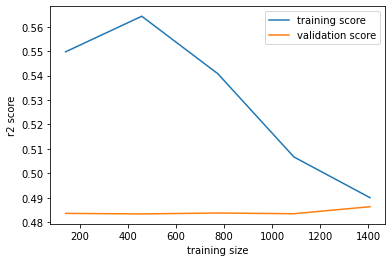

In [72]:
plt.plot(train_sizes, train_score, label='training score')
plt.plot(train_sizes, test_score, label='validation score')
plt.ylabel('r2 score')
plt.xlabel('training size')
plt.legend()

# Data Preparation

## Detecting outliers

<AxesSubplot:>

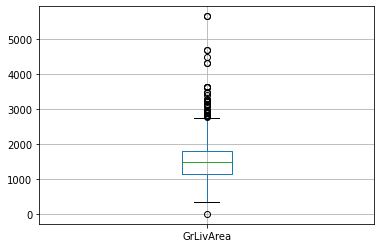

In [77]:
data[['GrLivArea']].boxplot()

In [78]:
data = data[(data['GrLivArea']<5000)&(data['GrLivArea']>0)].reset_index(drop=True)

In [79]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## One Hot Encoding (features)

In [139]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False)
encoder.fit(data[['Alley']])
encoded=encoder.transform(data[['Alley']])
data[encoder.categories_[0]]=encoded
data

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Grvl,NoAlley,Pave
0,0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,...,NaN,0,2,2008,WD,Normal,208500,0.0,1.0,0.0
1,1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,...,NaN,0,5,2007,WD,Normal,181500,0.0,1.0,0.0
2,2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,...,NaN,0,9,2008,WD,Normal,223500,0.0,1.0,0.0
3,3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,...,NaN,0,2,2006,WD,Abnorml,140000,0.0,1.0,0.0
4,4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,...,NaN,0,12,2008,WD,Normal,250000,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1453,1456,60,RL,62.0,7917,Pave,NoAlley,Reg,Lvl,...,NaN,0,8,2007,WD,Normal,175000,0.0,1.0,0.0
1454,1454,1457,20,RL,85.0,13175,Pave,NoAlley,Reg,Lvl,...,NaN,0,2,2010,WD,Normal,210000,0.0,1.0,0.0
1455,1455,1458,70,RL,66.0,9042,Pave,NoAlley,Reg,Lvl,...,Shed,2500,5,2010,WD,Normal,266500,0.0,1.0,0.0
1456,1456,1459,20,RL,68.0,9717,Pave,NoAlley,Reg,Lvl,...,NaN,0,4,2010,WD,Normal,142125,0.0,1.0,0.0


## Drop Duplicates

In [82]:
data.duplicated().sum()

299

In [83]:
data.drop_duplicates(inplace=True)

In [85]:
data.reset_index(inplace=True)

## Handling Null Values

In [98]:
df=pd.DataFrame(data=data.isnull().sum().sort_values(ascending=False)/len(data)).round(3)
df

,0
WallMat,0.997
PoolQC,0.996
MiscFeature,0.963
Alley,0.938
Fence,0.807
...,...
ExterQual,0.000
Exterior2nd,0.000
Exterior1st,0.000
RoofMatl,0.000


In [100]:
data.WallMat.value_counts()
data.drop(columns=['WallMat'], inplace=True)

In [101]:
data.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [104]:
import numpy as np
data.Alley.replace(np.nan, "NoAlley", inplace=True)
data.Alley.value_counts()

NoAlley    1367
Grvl         50
Pave         41
Name: Alley, dtype: int64

## Impute missing data

<AxesSubplot:>

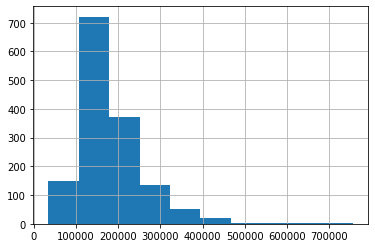

In [107]:
data.SalePrice.hist()

In [109]:
data.Pesos.isnull().sum()

10

In [110]:
data.Pesos.replace(np.nan, data.Pesos.mean(), inplace=True)

### Simple Imputer

In [112]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="mean")

In [113]:
imputer.fit(data[['Pesos']])
data['Pesos'] = imputer.transform(data[['Pesos']])

## Scaling

<AxesSubplot:>

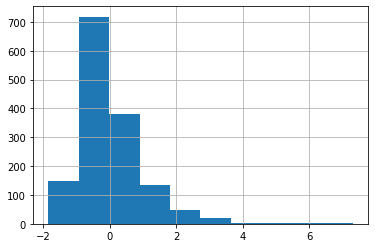

In [117]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(data[['Pesos']])
data['Pesos']=scaler.transform(data[['Pesos']])
data['Pesos'].hist()

## Balacing

Smote method is an interpolation of points from the minority class

## Feature Selection

Curse of dimensionality: the complexity of the algo grows exponentially with the number of features

## Feature Correlation

Removing highly correlated values increases the performance of the algo

<AxesSubplot:>

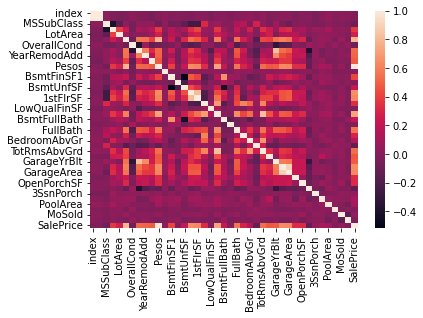

In [131]:
import seaborn as sns

corr=data.corr()
sns.heatmap(corr)

In [133]:
corr_df=corr.unstack().reset_index()
corr_df.columns = ['feature1', 'feature2', 'corr']
corr_df.sort_values(by='corr', ascending=False, inplace=True)
corr_df=corr_df[corr_df['feature1']!=corr_df['feature2']]
corr_df

,feature1,feature2,corr
1,index,Id,1.000000
41,Id,index,1.000000
1650,SalePrice,Pesos,0.990356
450,Pesos,SalePrice,0.990356
1219,GarageCars,GarageArea,0.887607
...,...,...,...
125,LotFrontage,MSSubClass,-0.404245
594,BsmtUnfSF,BsmtFullBath,-0.423342
834,BsmtFullBath,BsmtUnfSF,-0.423342
586,BsmtUnfSF,BsmtFinSF1,-0.516712


# K Nearest Neighbors

KNN uses a simple logic: we choose a parameter K, say K=5.

Let's assume we have X_new.

From there, we look at the K=3 nearest neighbors: X0, X1, X2.

If the task is a classification task, we use the voting logic to determine the output.

If the task is a regression task, we take the barycenter of $y_1, y_2, y_3$.

# Baseline Score

For Regression: a baseline score can be the mean

For Classification: a baseline score can be 1/n_labels

# Regression metrics

## MSE

L2 distance between y_pred and y

Penalises large errors

Sensitive to outliers

## MAE

L1 distance. Less sensitive to outliers

## Coefficient of determination R2

Useful to compare different models

The ratio of the variance of the dependent variables that is explained by the independent variables

## Max error

Biggest error done by the model

## Comparing Metrics during CV

In [186]:
import pandas as pd
data=pd.read_csv('insurance_data.csv')
X=data[['age','bmi','children','smoker']]
y=data['charges']

In [151]:
from sklearn.model_selection import cross_validate
model=LinearRegression()
cv=cross_validate(model, X,y, cv=5, scoring=['r2','neg_mean_absolute_error','neg_mean_squared_error'])
cv=pd.DataFrame(cv)
cv.mean()

fit_time                        4.133654e-03
score_time                      1.989603e-03
test_r2                         7.468010e-01
test_neg_mean_absolute_error   -4.194523e+03
test_neg_mean_squared_error    -3.693034e+07
dtype: float64

# Classification Metrics

## Confusion Matrix

True Positive: predicted positive, truth is positive.    
True Negative: predicted negative, truth is negative.  
False Positive: predicted positive, truth is negative.  
False Negative: predicted negative, truth is positive.

In [159]:
y_test = [0, 1, 0, 0, 1, 0, 1, 1, 0, 1] # actual truths
preds = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1] # predictions

results_df = pd.DataFrame({"actual": y_test,
                           "predicted": preds}) #Store results in a dataframe

confusion_matrix = pd.crosstab(index= results_df['actual'],
                               columns = results_df['predicted'])

confusion_matrix

predicted,0,1
actual,,
0,3,2
1,1,4


## Accuracy

Accuracy: how many times did I predicted right  
A = (TP+TN)/(TP+TN+FP+FN)

Accuracy needs to be treated carefully  
If I have a very imbalanced dataset (actual negative=90%), and my model predicts only the most frequent class, I will have a high accuracy

## Recall

R = TP / (TP+FN)  
How many positive did I predict among the actual positive.  
Am I good in detecting frauds for example. 

## Precision

P = TP / (TP+FP)  
How well my model avoids false alarms  

## F1 Score

Harmonic mean of precision and recall  

Useful to compare models

## Precision Recall Tradeoff 
https://kitt.lewagon.com/camps/883/lectures/content/05-ML_03-Performance-Metrics.html

# What happens behind .fit

In [169]:
df=pd.DataFrame({'weight': [75, 85, 96], 'height':[1.78, 1.86, 1.99]})
df

,weight,height
0,75,1.78
1,85,1.86
2,96,1.99


In [172]:
model=LinearRegression()
X=df[['weight']]
y=df['height']
model.fit(X,y)
model.__dict__

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'coef_': array([0.01003021]),
 '_residues': 0.0002664652567975805,
 'rank_': 1,
 'singular_': array([14.8548533]),
 'intercept_': 1.0207552870090635}

.fit optimizes the loss function i.e. minimizes the L2 norm of residuals

Which method (solver) is used here knowing that the L2 loss function is a parable?

# Gradient Descent

This is the most basic solver to solve for argmin(beta, Loss_function)  
We take beta_0=0 for example and from it we compute the derivative of the Loss Function.  
If the derivative is negative, we move to the right of the curve and we recompute beta_0 as beta_0 - * eta * derivative, where eta is called learning rate.  
This step is called an Epoch.  
We repeat this steps until we approach the minimum given by: derivative = 0.  
Two ways of making the algo converge: either we fix a max number of steps or we fix a min step size. If the min step size is reached we stop the algo.  
If the learning rate is too big, we might cross the solution back and forth without ever reaching it.  
If the learning rate is too small, we might not reach it in time.  

# Mini Batch Gradient Descent

Instead of computing the loss function on the whole dataset, which might be computationally expensive, we choose what we call a batch size or a mini-batch size, for example: batch_size = 16.  
When we hear back the value of the derivative, we update beta_0 and move to the next batch.  
This method ends up converging with less computation.

# Stochastic Gradient Descent
It is when batch_size=1

# Comparing SGD vs LinearRegression (SVD)

In [177]:
from sklearn.datasets import make_regression

# Create a "fake problem" to solve
X, y = make_regression(n_samples=10000, n_features=1000)

In [179]:
from sklearn.linear_model import SGDRegressor, LinearRegression
lin_reg = LinearRegression() # OLS solved by matrix inversion (SVD method) -- complexity n^2*p+p^3
lin_reg_sgd = SGDRegressor(loss='squared_loss') # OLS solved by SGD

In [180]:
%%time
lin_reg.fit(X,y)

CPU times: user 6.54 s, sys: 7.05 s, total: 13.6 s
Wall time: 2.65 s


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [181]:
%%time
lin_reg_sgd.fit(X,y)


CPU times: user 204 ms, sys: 5.04 ms, total: 209 ms
Wall time: 213 ms


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

# Solvers

## Enhanced Gradient Descent

We can add properties to the quality of the descent.  
Adding a momentum or inertia (think of black holes).  
Updating the learning rate ('ada': adaptative learning rate).  
The combination of both is called adam and is very efficient in practice

## Hessian Method

This is like adding an order to the slope which is computationally more expensive.  
However number of epochs should be smaller.

# Overfitting and underfitting
Both have high test error.  
However, overfitting has a low bias, where underfitting has a high bias.

# Model Tuning

## Regularization

Regularization is a method consisting in adding a penalty term to the loss function in order to penalize large values of beta and sometimes forcing some beta_i to shrink. This method is used to avoid overfitting.  
The most common are: Ridge (L2 norm): $\alpha * SumSquared(\beta_i)$ and Lasso which is the L1 norm of beta_i  
There is a new hyperparameter to take into account which is alpha.  
The bigger the alpha, the less we listen to the contribution of the variables, the less overfitted is the model.  
Adding a penalty is a way of combatting overfitting !  

## Comparing Ridge vs Lasso

In [194]:
import pandas as pd
data=pd.read_csv('insurance_data.csv')
X=data[['age','bmi','children','smoker']]
y=data['charges']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

In [199]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
linreg=LinearRegression()
lasso=Lasso(alpha=1000)
ridge=Ridge(alpha=1000)

linreg.fit(X_scaled,y)
lasso.fit(X_scaled,y)
ridge.fit(X_scaled,y)

coefs=pd.DataFrame({
    'coefs_linreg': pd.Series(linreg.coef_, index=X.columns),
    'coefs_lasso': pd.Series(lasso.coef_, index=X.columns),
    'coefs_ridge': pd.Series(ridge.coef_, index=X.columns)
})

coefs

,coefs_linreg,coefs_lasso,coefs_ridge
age,11842.070388,1706.876339,1325.968155
bmi,11997.212659,0.000000,504.982804
children,2351.356707,0.000000,236.868200
smoker,23788.125110,17507.542736,4229.055765


Increasing alpha in Lasso will shrink coeffs to 0  
Increasing alpha in Ridge will shrink coeffs towards 0

ElasticNet is a combination of both Lasso and Ridge: $\lambda L1 + (1-\lambda) L2$  
Therefore there are two hyperparamets to fine-tune: $\beta$ and $\lambda$

***************************
<b>Regularization tends to penalize features that are not statistically significant</b>
***************************

## Fine-tuning using Grid Search

Well, let's make sure first of all that we hold out a test set before computing cross val scores.  
Grid Search consists of trying out a combination of possible hyper-parameters before choosing the best one.  

In [200]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [201]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
#model : elastic search with alpha and beta

alphas=[0.01, 0.1, 1]
lambdas=[0.2, 0.5, 0.8]

import itertools
combinations=itertools.product(alphas, lambdas)

for alpha, l1_ratio in combinations:
    model=ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    score=cross_val_score(model, X_train, y_train, cv=5).mean()
    print(f'alpha: {alpha}, l1_ratio: {l1_ratio}, score: {score}')

alpha: 0.01, l1_ratio: 0.2, score: 0.7479157887463523
alpha: 0.01, l1_ratio: 0.5, score: 0.7486280797870868
alpha: 0.01, l1_ratio: 0.8, score: 0.7489854268745896
alpha: 0.1, l1_ratio: 0.2, score: 0.6828624241724609
alpha: 0.1, l1_ratio: 0.5, score: 0.7158740951701986
alpha: 0.1, l1_ratio: 0.8, score: 0.7421916293056198
alpha: 1, l1_ratio: 0.2, score: 0.31279478391705473
alpha: 1, l1_ratio: 0.5, score: 0.3909664737533748
alpha: 1, l1_ratio: 0.8, score: 0.5601068847364707


There is a more straightforward way to performing GridSearch while performing CV scoring: <b>Grid Search CV</b>

In [204]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
grid={'alpha':[0.01, 0.1, 1],
     'l1_ratio':[0.2, 0.5, 0.8]}

model=ElasticNet()
search=GridSearchCV(model, grid, scoring='r2', cv=5, n_jobs=-1)

search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1], 'l1_ratio': [0.2, 0.5, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [205]:
search.best_estimator_

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.8,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Besides the grid search CV method, there is a more systematic one and more automated one, called Randomized Search CV.   
Instead of fixing the grid, we fix the length of the interval and we call on it uniform laws to test for hyper parameters values.  

## Fine tuning using Randomized Search CV

In [212]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

uniform=stats.uniform(0,1)
grid={'alpha':uniform,'l1_ratio': uniform}
model=ElasticNet()
search=RandomizedSearchCV(model, grid, scoring='r2', cv=5, n_iter = 1000, n_jobs=-1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

search.fit(X_train, y_train)
model=search.best_estimator_

In [214]:
model.__dict__

{'alpha': 0.00028780495685298835,
 'l1_ratio': 0.8031527771845399,
 'fit_intercept': True,
 'normalize': False,
 'precompute': False,
 'max_iter': 1000,
 'copy_X': True,
 'tol': 0.0001,
 'warm_start': False,
 'positive': False,
 'random_state': None,
 'selection': 'cyclic',
 'n_iter_': 5,
 'coef_': array([  264.93997963,   306.08517829,   426.00417583, 23610.92081122]),
 'dual_gap_': 148874.64698028564,
 'intercept_': -11915.5630123048}

# Support Vector Machines

# Ensemble Methods

## Decision Trees Classifier

A set of supervised learning algos that are based on binary decision trees.  
These are not linear but are suited for classification and regression tasks

In [219]:
from sklearn.datasets import load_iris

iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
data.drop(columns=['sepal length (cm)', 'sepal width (cm)'], inplace=True)
data

,petal length (cm),petal width (cm),target
0,1.4,0.2,0.0
1,1.4,0.2,0.0
2,1.3,0.2,0.0
3,1.5,0.2,0.0
4,1.4,0.2,0.0
...,...,...,...
145,5.2,2.3,2.0
146,5.0,1.9,2.0
147,5.2,2.0,2.0
148,5.4,2.3,2.0


In [222]:
X=data.drop(columns=['target'])
y=data['target']
X

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [225]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(max_depth=2)
tree.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [237]:
print(tree.predict([[4,1]]))
print(tree.predict_proba([[4,1]]))

[1.]
[[0.         0.90740741 0.09259259]]


The idea is to separate the data in an optimal way according to the dimensions.  
At each step of the algo, we will try to find an optimal threshold such as the Gini index is optimized.  
The Gini index is $1 - \sum(p_i^{2})$ where $p_{i}$ is the ratio of each class in the remaining subset.  
The lower the Gini index is, the better.

## Decision Trees Regressor

The idea is the same except that we predict a continuous variable and not a class

## Pros and cons of decision trees

<b>Pros:</b> 
* easy to implement, intuitive  
* no scaling is necessary  
* allows for feature selection  
* resistant to outliers  

<b>Cons:</b>  
* high variance
* long training time if max depth grows: $O(n*m*depth)$
* splits data orthogonally according features so sometimes makes sense to perform PCA before

# Bagging

Bagging uses parallel decision trees  
This is a method that efficient to reduce variance. 
For each bagged tree, the dataset is regenerated with replacement. 
When we have a new X to predict, we pass the X through the generated bagged trees and we compute the output for each bagged tree. 
If the task is a classification task, we decide final output by voting. 
If the task is a regression task, we decide the final result by average. 

In [240]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
cls=RandomForestClassifier(max_depth=100, n_estimators=100)
reg=RandomForestRegressor(max_depth=100, n_estimators=100)

## Pros and Cons

<b>Pros</b>
* reduces variance compared to a single Decision Tree
* bagging can involve any model, see subsection below

<b>Cons</b>
* time consuming
* disregards performance of sub-models

## Bagging other models and evaluating oob: out-of-bag score (test sample)

In [247]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression

model=LinearRegression()
reg=BaggingRegressor(model, n_estimators=100, oob_score=True)

reg.fit(X,y).oob_score_

0.9229692169208474

# Boosting

Boosting a method used to train weak learners so that they learn from their predecessors  
The objective is to reduce bias. 
Boosting is sequential learning, bagging is parallel learning. 

## Adaptative Boosting

This is an algo that follows these steps:  
* at step 0, all obs have the same weight. 
* we train a weak learner, typically a decision tree. 
* for each observation i, if predicted correctly, we decrease the weight $w_i$ and if not we increase $w_i$
* we train a weak learner, where high weighted obs are given more priority
* we repeat until obs are perfectly predicted or a preset number of weak learners are trained

In [255]:
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
weak_learner=DecisionTreeClassifier(max_depth=3)
ada=AdaBoostClassifier(weak_learner, n_estimators=10)
cv=cross_validate(ada,X,y,cv=5)
cv


{'fit_time': array([0.02379107, 0.01382208, 0.00335193, 0.01187825, 0.00949216]),
 'score_time': array([0.00301218, 0.00217581, 0.00093102, 0.00154972, 0.00129795]),
 'test_score': array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ])}

## Gradient Boosting and extreme gradient boosting

We start with average as estimator and we compute the loss or residuals.  
We compute the derivate and depending on its direction, we move to the opposite : contribution * learning_rate  
We repeat

# Unsupervised Learning

## PCA

## K-means: galaxies and blackholes